In [1]:
!pip install pandas -q

In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pylab as plt
import pandas as pd

In [2]:
# !cat  traces.log | grep 'element-latency'

In [3]:
input = 'app_traces.log'

In [6]:
measurements_by_element = defaultdict(dict)

with open(input, 'r') as f:
    data = f.readlines()

for l in data:
    if 'GST_TRACER' not in l:
        continue
    l = l.split()
    if len(l) == 12:
        try:
            name = l[8][16:-1]
            latency = int(l[10][14:-1]) / 10**6
            ts = int(l[11][12:-1]) / 10**6
    
            if name not in measurements_by_element:
                measurements_by_element[name]['latency'] = []
                measurements_by_element[name]['ts'] = []
            measurements_by_element[name]['latency'].append(latency)
            measurements_by_element[name]['ts'].append(ts)
        except:
            print(l)
            break

In [7]:
columns = ['element', 'avg (ms)', 'median (ms)', 'min (ms)', 'max (ms)', 'std (ms)', 'p99 (ms)']
data = []

for k, v in measurements_by_element.items():
    l = np.array(measurements_by_element[k]['latency'])

    data.append([
        k,
        np.mean(l),
        np.median(l),
        np.min(l),
        np.max(l),
        np.std(l),
        np.percentile(l, 99)
    ])

df = pd.DataFrame(data=data, columns=columns)

pd.options.display.float_format = '{:,.2f}'.format
df

,element,avg (ms),median (ms),min (ms),max (ms),std (ms),p99 (ms)
0,qtdemux0,12.98,0.04,0.02,379.15,17.51,36.74
1,multiqueue0,65.23,0.11,0.01,392.94,81.86,171.30
2,aacparse0,0.03,0.03,0.01,0.16,0.02,0.07
3,h264parse0,0.07,0.07,0.02,3.01,0.08,0.13
4,capsfilter0,0.02,0.02,0.01,0.16,0.01,0.10
5,avdec_aac0,0.06,0.07,0.02,0.22,0.03,0.11
6,nvv4l2decoder0,120.04,131.98,13.41,379.80,23.69,166.65
7,nvurisrc_bin_queue,129.59,131.08,0.25,170.49,29.20,167.46
8,nvurisrc_bin_nvvidconv_elem,0.03,0.03,0.01,0.10,0.02,0.09
9,nvurisrc_bin_src_cap_filter_nvvidconv,0.02,0.01,0.01,0.23,0.01,0.04


qtdemux0 3692
multiqueue0 3692
aacparse0 2250
h264parse0 1442
capsfilter0 1442
avdec_aac0 2249
nvv4l2decoder0 742
nvurisrc_bin_queue 1442
nvurisrc_bin_nvvidconv_elem 1442
nvurisrc_bin_src_cap_filter_nvvidconv 1442
infer 1442
osd 1442
nvvideoconvert0 1442


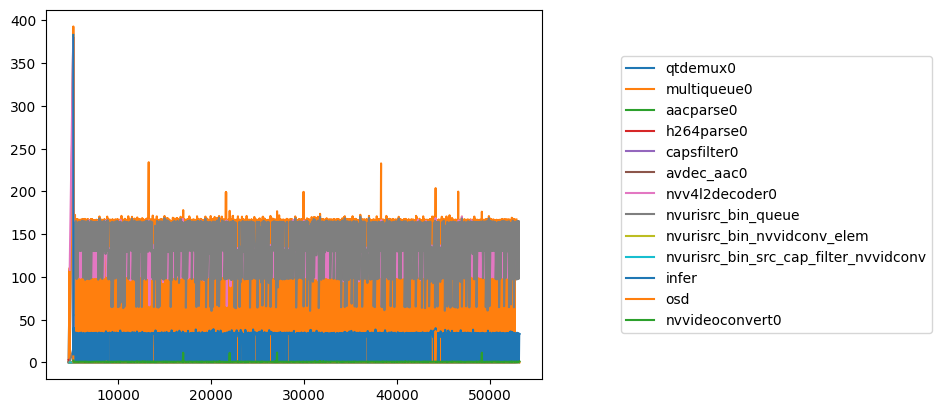

In [8]:
ignore_elemtns = set(['mux'])

# plt.xlim(1000, 1200)
# plt.ylim(0, 200)
for k, v in measurements_by_element.items():
    if k in ignore_elemtns:
        continue
    l = np.array(measurements_by_element[k]['latency'])
    t = np.array(measurements_by_element[k]['ts'])
    print(k, len(l))
    plt.plot(t, l, label=k)
plt.legend(loc='right',  bbox_to_anchor=(1.8, 0.5))


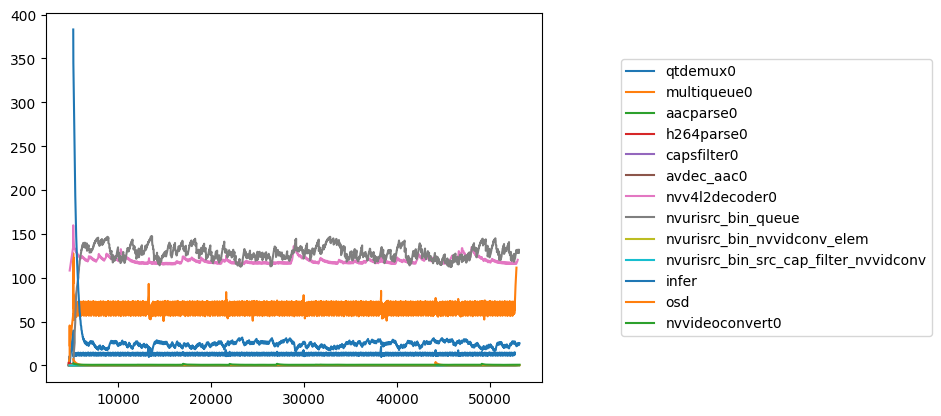

In [8]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed


ignore_elemtns = set(['mux'])

# plt.xlim(1000, 1200)
# plt.ylim(0, 200)
for k, v in measurements_by_element.items():
    if k in ignore_elemtns:
        continue
    l = np.array(measurements_by_element[k]['latency'])
    t = np.array(measurements_by_element[k]['ts'])
    plt.plot(t, smooth(l, 0.9), label=k)
plt.legend(loc='right',  bbox_to_anchor=(1.8, 0.5))


In [9]:
# Follow tracing log
# https://stackoverflow.com/questions/12523044/how-can-i-tail-a-log-file-in-python
#

In [14]:
df.sort_values(by='avg (ms)', ascending=False)

,element,avg (ms),median (ms),min (ms),max (ms),std (ms),p99 (ms)
10,mux,"7,873,333,571,432.65",0.09,0.00,"18,446,744,073,709.55","9,124,033,530,849.09","18,446,744,073,709.55"
7,nvurisrc_bin_queue,129.59,131.08,0.25,170.49,29.20,167.46
6,nvv4l2decoder0,120.04,131.98,13.41,379.80,23.69,166.65
1,multiqueue0,65.23,0.11,0.01,392.94,81.86,171.30
11,infer,24.53,33.68,0.73,383.06,17.75,37.67
0,qtdemux0,12.98,0.04,0.02,379.15,17.51,36.74
13,nvvideoconvert0,0.84,0.79,0.57,11.58,0.57,1.35
12,osd,0.32,0.28,0.13,36.76,0.98,0.48
3,h264parse0,0.07,0.07,0.02,3.01,0.08,0.13
5,avdec_aac0,0.06,0.07,0.02,0.22,0.03,0.11


In [16]:
df.to_csv("output.csv", header=True, float_format="%.2f")